In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from copy import deepcopy
import pandas as pd
from sklearn import preprocessing

In [4]:
lam = 0.5
gamma=0.5
def sm_loss(X,y,w):
    phi_z=[]
    for i in range(len(X)):
        z=y[i]*np.dot(w, X[i])
        if z>=1:
            phi_z.append(0)
        elif (1-gamma)<z<1:
            phi_z.append((1-z)**2/(2*gamma))
        else:
            phi_z.append(1-0.5*gamma-z)
        
    return np.sum(phi_z)
def objective(X,y,w, lam):
    tmp=[]
    n_samples, m_features = X.shape
    return sm_loss(X,y,w)/n_samples+lam*np.sum(np.abs(w))

def prox(z, m_features):
    w = np.zeros(m_features,dtype=float)
    for i in range(m_features):
        if z[i] > lam:
            w[i] = z[i] - lam
        elif -lam < z[i] < lam:
            w[i]= 0
        else:
            w[i] = z[i] + lam
    return w

In [5]:
def lasso_proximal_gradient(X, y, lam, L=1, max_iter=1000,tol=0.001 ):
    beta = 0.5
    n_samples, m_features = X.shape
    w = np.empty(m_features, dtype=float)
    w_pre = np.empty(m_features,dtype=float)
    #grad_w=np.empty(m_features,dtype=float)
    prox_thres = lam/L
    h_prox_optval = np.empty(max_iter, dtype=float)
    path=[]
    for k in range(max_iter):
        los_w_tmp=[]
        w_tmp=np.zeros(m_features,dtype=float)
        for i,x in enumerate(X):
            if (y[i]*np.dot(X[i],w))>=1:
                grad_w = np.zeros(m_features,dtype=float)
            elif -0.5<(y[i]*np.dot(X[i],w))<1:
                grad_w = 2*(1-y[i]*np.dot(X[i],w))*X[i]*y[i]
            else:
                grad_w = X[i]*y[i]
           #w_tmp = np.sign(w-grad_w/L)*np.maximum(np.abs(w-grad_w/L)-prox_thres,0)
            z = w - grad_w/L
            w_tmp = prox(z, m_features)
            w_diff = w_tmp-w
            los_w_tmp.append(sm_loss(X, y, w_tmp))
            if sm_loss(X, y, w_tmp) <= sm_loss(X, y, w) + np.dot(grad_w, w_diff) + L/2 * np.sum(w_diff**2):
                break
        L = L / beta
        w_pre=deepcopy(w)
        w = deepcopy(w_tmp)
        path.append(w)
        h_prox_optval[k] = objective(X, y,w,lam)
        if k>0 and abs(h_prox_optval[k]-h_prox_optval[k-1])<tol:
            break
    return path,w, h_prox_optval[:k+1]    

def lasso_proximal_gradient_acc_ver(X, y, lam, L=1, max_iter=1000,tol=1e-4 ):
    beta = 0.5
    n_samples, m_features = X.shape
    s = [1]*max_iter
    w = np.empty(m_features, dtype=float)
    v = w
    w_pre = np.empty(m_features,dtype=float)
    #grad_w=np.empty(m_features,dtype=float)
    prox_thres = lam/L
    h_prox_optval = np.empty(max_iter, dtype=float)
    path=[]
    for k in range(max_iter):
        los_w_tmp=[]
        w_tmp=np.zeros(m_features,dtype=float)
        for i,x in enumerate(X):
            if (y[i]*np.dot(X[i],w))>=1:
                grad_w = np.zeros(m_features,dtype=float)
            elif -0.5<(y[i]*np.dot(X[i],w))<1:
                grad_w = 2*(1-X[i]*y[i]*w)*X[i]*y[i]
            else:
                grad_w = X[i]*y[i]
            #w_tmp = np.sign(v-grad_w/L)*np.maximum(np.abs(v-grad_w/L)-prox_thres,0)
            z = w - grad_w/L
            w_tmp = prox(z, m_features)
            w_diff = w_tmp-w
            los_w_tmp.append(sm_loss(X, y, w_tmp))
            if sm_loss(X, y, w_tmp) <= sm_loss(X, y, w) + np.dot(grad_w, w_diff) + L/2 * np.sum(w_diff**2):
                break
        s[k+1]=(1+(1+4*s[k])**(1/2))/2
        v=w_tmp + ((1-s[k])/s[k+1])*(w-w_tmp)
        L = L / beta
        w_pre=deepcopy(w)
        w = deepcopy(w_tmp)
        path.append(w)
        h_prox_optval[k] = objective(X, y,w,lam)
        if k>0 and abs(h_prox_optval[k]-h_prox_optval[k-1])<tol:
            break
    return path,w, h_prox_optval[:k+1]  

In [6]:
dataset = np.random.uniform(-1,1,(100,2))
po_data = [val for val in dataset if val[0]>0]
ne_data=[val for val in dataset if val[0]<0]
po_data = np.array(po_data)
ne_data = np.array(ne_data)
y=[1]*len(po_data)+[-1]*len(ne_data)
# po_frame = pd.DataFrame(po_data)
# ne_frame = pd.DataFrame(ne_data)
# data_frame = pd.concat([po_frame, ne_frame])
# data_frame['y'] = y

# run function on this dataset


In [7]:
x_p = [row[0] for row in po_data]
y_p = [row[1] for row in po_data]
x_n = [row[0] for row in ne_data]
y_n = [row[1] for row in ne_data]

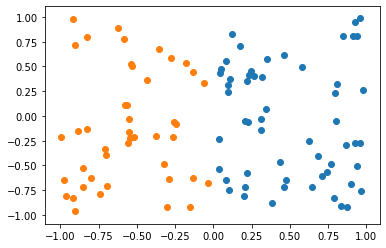

In [8]:
plt.scatter(x_p, y_p)
plt.scatter(x_n, y_n)
plt.savefig('toy_data_distribution')

In [22]:
lam=0.5
path,w, h_prox_optval=lasso_proximal_gradient(dataset, y, lam, tol=0.01 )
#path_acc,w_acc, h_prox_optval_acc=lasso_proximal_gradient_acc_ver(dataset, y, 0.1,tol=0.01 )

In [77]:
w

array([0., 0.])

In [ ]:
w_acc

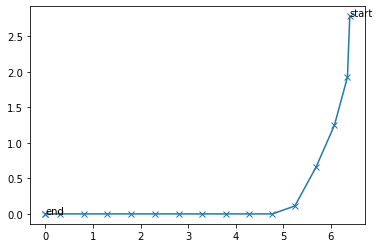

In [23]:
x1=[x[0] for x in path]
x2=[x[1] for x in path]
plt.text(x1[0],x2[0],'start')
plt.text(x1[-1],x2[-1],'end')
plt.plot(x1,x2,'-x')
plt.savefig('process of training')

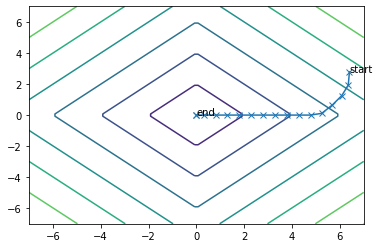

In [24]:
from numpy import linalg as LA

w1=np.linspace(-7,7,100)
w2=np.linspace(-7,7,100)
w_1,w_2=np.meshgrid(w1,w2)

matrix_1=np.zeros((100,100))
for i in range(len(w1)):
    for j in range(len(w2)):
        matrix_1[i,j]=abs(w1[i])+abs(w2[j])

matrix_2=np.zeros((100,100))
for i in range(100):
    for j in range(100):
        phi_z=[]
        for d in range(len(dataset)):
            z=y[d]*np.dot([w1[i],w2[j]], dataset[d])
            if z>=1:
                phi_z.append(0)
            if 1-gamma<z<1:
                phi_z.append((1-z)**2/(2*gamma))
            else:
                phi_z.append(1-0.5*gamma-z)
        
        matrix_2[i,j]=np.sum(phi_z)/100

F_w = matrix_1*0.5+matrix_2/100
plt.contour(w_1,w_2,F_w)
plt.text(x1[0],x2[0],'start')
plt.text(x1[-1],x2[-1],'end')
plt.plot(x1,x2,'-x')
plt.savefig('StdProxGrad training processing of Toy-data')

In [27]:
# real UCI dataset verification:
real_dataset = pd.read_csv('hepatitis.data')

In [28]:
a=real_dataset.pop('Unnamed: 0')

In [29]:
y = real_dataset.pop('19')

In [32]:
real_dataset['5'] = pd.to_numeric(real_dataset['5'],errors='coerce')
real_dataset['6'] = pd.to_numeric(real_dataset['6'],errors='coerce')
real_dataset['7'] = pd.to_numeric(real_dataset['7'],errors='coerce')

In [46]:
real_dataset['5'].iloc[np.where(real_dataset['5'].isnull())] = np.mean(real_dataset['5'])
real_dataset['6'].iloc[np.where(real_dataset['6'].isnull())] = np.mean(real_dataset['6'])
real_dataset['7'].iloc[np.where(real_dataset['7'].isnull())] = np.mean(real_dataset['7'])

In [47]:
real_dataset_normalized = preprocessing.normalize(real_dataset, norm='l2')

In [49]:
path,w, h_prox_optval=lasso_proximal_gradient(real_dataset_normalized, y, 0.5,tol=0.001 )

In [50]:
h_prox_optval

array([5.64066477, 1.25151044, 0.88746964, 0.76776183, 0.75      ,
       0.75      ])

In [52]:
h_diff= []
for i in range(len(h_prox_optval)):
    h_diff.append(h_prox_optval[i+1]-h_prox_optval[i])
    if i == len(h_prox_optval)-2: 
        break

C:\Users\zhaoyiming\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


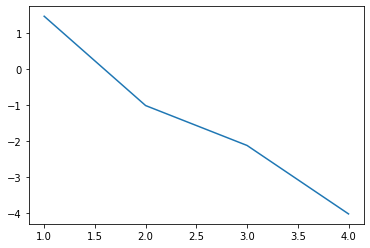

In [78]:
x=np.arange(1,len(y)+1)
y=[i*(-1) for i in h_diff]
plt.plot(x,np.log(y))
plt.savefig('hepatitis_training_process')